In [15]:

import visilibity as vg
import numpy as np
from polygon_conversions import list_from_polygon, list_from_polygon_array, polygon_list_from_numpy, get_map
import  matplotlib.pyplot as plt

In [94]:
polygon_p = None

In [128]:
class PathPlanning(object):
    def __init__(self):
        self.robot_radius = 0.15
#         self.world = np.array([[self.robot_radius, self.robot_radius], [3. - self.robot_radius, self.robot_radius],
#                   [3. - self.robot_radius, 2. - self.robot_radius], [2.55 + self.robot_radius, 2. - self.robot_radius],
#                  [2.55 + self.robot_radius, 1.543 - self.robot_radius],
#                                [0.45 - self.robot_radius, 1.543 - self.robot_radius],
#                  [0.45 - self.robot_radius, 2. - self.robot_radius], [self.robot_radius, 2. - self.robot_radius]])
        self.chaos_zone_purple = np.array([[1. - self.robot_radius, 1 - self.robot_radius], [1. - self.robot_radius, 1. + self.robot_radius], [1. + self.robot_radius, 1. + self.robot_radius], [1. + self.robot_radius, 1. - self.robot_radius]])
        self.chaos_zone_yellow = np.array([[2. - self.robot_radius, 1 - self.robot_radius], [2. - self.robot_radius, 1. + self.robot_radius], [2. + self.robot_radius, 1. + self.robot_radius], [2. + self.robot_radius, 1. - self.robot_radius]])
        self.epsilon = 0.0001
        self.is_flipped = False
        robot_radius = 0.15
        self.world = np.array([[robot_radius, robot_radius], [3. - robot_radius, robot_radius], 
                  [3. - robot_radius, 2. - robot_radius], [2.55 + robot_radius, 2. - robot_radius],
                 [2.55 + robot_radius, 1.543 - robot_radius], [0.45 - robot_radius, 1.543 - robot_radius],
                 [0.45 - robot_radius, 2. - robot_radius], [robot_radius, 2. - robot_radius]])

    @staticmethod
    def points2vis_graph(points):
        points_list = []
        for point in points:
            print point
            points_list.append([vg.Point(x[0], x[1]) for x in point])
        g = vg.Visibility_Graph()

        polygon_list = []
        for i in points_list:
            print vg.Polygon(i).is_in_standard_form()
            polygon_list.append(vg.Polygon(i))
        print polygon_list    
        g = vg.Environment(polygon_list)
        return g

    @staticmethod
    def vg_path2points(path):
        path_ = []
        for i in path.path():
            path_.append([i.x(), i.y(), 0])
        return np.array(path_)

    @staticmethod
    def point2vg(point):
        return vg.Point(point[0], point[1])

    def create_path(self, start_point, goal_point, polygon):
        p = []
        p.append(self.world)
        a = self.points2vis_graph(p)
        vg_start_point = self.point2vg(start_point)
        vg_goal_point = self.point2vg(goal_point)
#         start_point = np.array([0.22, 1.72])
#         goal_point = np.array([2.8, 1.3])
        vg_start_point = self.point2vg(start_point)
        vg_goal_point = self.point2vg(goal_point)
#         vg_start_point = vg.Point(0.2, 1.7)
#         vg_goal_point = vg.Point(2.8, 1.7)
        vg_start_point.snap_to_boundary_of(a, self.epsilon)
        vg_start_point.snap_to_vertices_of(a, self.epsilon)
        isovis = vg.Visibility_Polygon(vg_start_point, a,self.epsilon)
        polygon_vis = vg.Visibility_Polygon(vg_goal_point, a, self.epsilon)
        shortest_path = a.shortest_path(vg_start_point, vg_goal_point, self.epsilon)
        return self.vg_path2points(shortest_path)


In [129]:
path_planner = PathPlanning()

In [130]:
print path_planner.world

[[0.15  0.15 ]
 [2.85  0.15 ]
 [2.85  1.85 ]
 [2.7   1.85 ]
 [2.7   1.393]
 [0.3   1.393]
 [0.3   1.85 ]
 [0.15  1.85 ]]


In [131]:
path = path_planner.create_path(np.array([2.8, 1.7, 0]), np.array([0.2, 1.7, 0]), [])

[[0.15  0.15 ]
 [2.85  0.15 ]
 [2.85  1.85 ]
 [2.7   1.85 ]
 [2.7   1.393]
 [0.3   1.393]
 [0.3   1.85 ]
 [0.15  1.85 ]]
True
[<visilibity.Polygon; proxy of <Swig Object of type 'VisiLibity::Polygon *' at 0x7f2348f16660> >]


In [132]:
path

array([[2.8  , 1.7  , 0.   ],
       [2.7  , 1.393, 0.   ],
       [0.3  , 1.393, 0.   ],
       [0.2  , 1.7  , 0.   ]])

In [133]:
world = np.array(world)
print world

[[0.15  0.15 ]
 [2.85  0.15 ]
 [2.85  1.85 ]
 [2.7   1.85 ]
 [2.7   1.393]
 [0.3   1.393]
 [0.3   1.85 ]
 [0.15  1.85 ]]


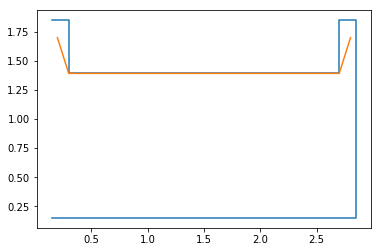

In [134]:
plt.plot(world[:, 0], world[:, 1])
plt.plot(path[:,0], path[:, 1])